# 1. CSV 파일 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1=pd.read_csv("ads_1/에어프라이어+%2B원고료 -내돈ANSI_174_1.csv", engine='python') #174행
df2=pd.read_csv("reviews_0/에어프라이어+%2B내돈 -원고료ANSI_113_0.csv", engine='python') #113행

### 광고, 후기 하나로 합치기

In [3]:
df=pd.concat([df1[:113],df2],axis=0) #각각의 개수를 113개로 일단 맞춰주었다. 226행.

### 중복 행, content가 비어있는 행 제거

In [4]:
df=df.drop_duplicates() #중복된것 없음
len(df.content[df.content.isna()==True]) #content가 비어있는 행도 없음

0

In [29]:
df

,num,content,img,sticker,video,tags,widget,isad
0,에어프라이어1_1,# 모즈 에어프라이어 통삼겹 치킨너겟 요리하면 안돼요 저는 가전제품이 새로 나오면...,22,0,6,0,0,1
1,에어프라이어1_2,"# 에어프라이어 추천, 환경호르몬 걱정없는 내돈내산 후기 날이 제법 추워지다 ...",12,0,0,0,0,1
2,에어프라이어1_3,# 에어프라이어 치킨 만들기 넘나 쉽다 ~ (ⓦ QUQU) 어제저녁에 신랑이 ...,26,0,0,1,0,1
3,에어프라이어1_4,# 명란 멘보샤 레시피 ft. 테팔 Tefal 대용량 에어프라이어 이지프라이 디럭스...,35,0,6,0,0,1
4,에어프라이어1_5,# 대용량 에어프라이어 추천 필립스 트윈터보스타 기술과 맛 차이 솔직 후기! (HD...,42,0,10,0,0,1
...,...,...,...,...,...,...,...,...
108,에어프라이어16_3,# 피델코리아 에어프라이어 1년후기 피델코리아 에어프라이어 2년전 에어프라이...,4,0,0,0,0,0
109,에어프라이어16_5,"# 맘스터치 해마로푸드 케이준 양념감자, 에어프라이어 냉동식품 추천 맘스터치 감자...",23,4,0,1,0,0
110,에어프라이어16_6,# 대용량 에어프라이어 추천 17리터로 한번에! 저는 기존에 에어프라이어 3l 짜...,15,0,0,0,0,0
111,에어프라이어16_8,# [내돈내산] 매직 쉐프 에어프라이어 3.5L 사용 후기 (왜 이제야 샀을까..☆...,13,0,0,0,0,0


### 불필요한 열 : num, widget 제거

In [57]:
df_a=df.drop(['num','widget'],axis=1)

In [6]:
y_data=np.array(df.isad.tolist()) #종속변수 isad

# 2. 의미없는 부분 제거
1. 공백 (\u200b)
2. \n
3. 문장부호
4. html 태그  

url은 의미가 있다고 판단하여 제거하지 않았다. https 가 유의미한 키워드로 사용될 것이라 가정

In [7]:
import re

In [58]:
#전처리 함수 정의: 문장을 IN
def cleaning(x):
    x=re.sub('<(/)?([a-zA-Z0-9]*)(\\s[a-zA-Z0-9]*=[^>]*)?(\\s)*(/)?>',' ',x) #html 태그 제거
    x=re.sub('\W', ' ', x) #특수문자 제거
    x=re.sub('([ㄱ-ㅎㅏ-ㅣ]+)', ' ', x) #한글 자음 모음 제거
    x=re.sub('\d','', x) #번호 제거
    x=x.replace('SE TEXT','')
    return x

#전체 행에 전처리 적용
df_a['content']=df_a.content.apply(cleaning)

In [59]:
#확인
print(df.content.values)
print(df_a.content.values)

['# 모즈 에어프라이어 통삼겹 치킨너겟 요리하면 안돼요  저는 가전제품이 새로 나오면 일단  사고 보는 타입이라 에어프라이기가  나왔을 때 구매한 1세대 얼리어답터인데요.     너무 열심히 사용하다 보니 최근에  기계가 사망하셔서 새로운 아이를  데려오기 위해 적극 물색 중이었어요.     후보로모즈에어프라이어와듀얼리  사이에서 처음엔 고심했는데요.                      결국안정성 측면에서도 그렇고  여러이유에서 듀얼리를 구매했거든요.     냉동식품도 조리해보고, 치킨너겟이나통삼겹,  생고기도구워보고 이것저것 실험적으로  사용해봤는데 다른 충분히 분들께도  권해드릴 만한 품질이라 리뷰로 찾아왔어요!     여기서 꿀팁을 드리자면!     시간이 오래걸려도에어프라이어의 경우  온도를 160도 에서180도 사이로 설정하고  시간을 길게 하고 기다리는게  더 바삭하고 맛있었어요!!                      포장을 다 제거하면 볼 수 있는 모습이에요.  디자인은 깔-끔 그 자체입니다.     의도한 바는 아니지만 저희집 냉장고와  비슷한 느낌의 고급스러운 디자인이라서  통일감이 있어 좋네요.                      여러 스타일의 요리를 도전하는 저에게는  요런 구성품도 좋았는데요.     다른 곳에서는 지급하지 않는 멀티렉을  증정하고 있더라고요!     뜨거울 때 바로 먹는 요리도 있지만  렉에 올려서 한김 식혀야 할 때도 있는데  요런 증정품은 호감입니다!!                      글 서두에 말씀드리길 처음에는 타사  물건과 요 아이 사이에서 고민 많이  했다고말씀드렸잖아요.     사놓고 보니 이렇게 어디 두어도 조화로운  디자인이 좋은 것 같지만, 첨엔 저도  아기자기한파스텔톤에 끌렸거든요.                      결정적으로 이 제품을 택하게 된 것은  어떤 후기 때문이었는데요.     제가고민했었던 그 상품에 예기치 못한  치명적인 단점이 존재하더라고요.        바로 제품의 유

# 2. 형태소 분석기 이용해 토큰화
형태소 분석기는 [Komoran](https://komorandocs.readthedocs.io/ko/latest/pykomoran/tutorial.html) 사용 <- 메소드 정리 페이지 

nouns : 명사 추출  
morphs : 형태소 추출  
pos : 품사 부착  

In [10]:
from konlpy.tag import *

### 사용자 사전, 분석대상 품사 리스트 추가  
1. userdict.txt 고유명사, 신조어 등을 새로 등록. 이들 단어에 품사 태그가 제대로 붙게 한다  
2. pos_table.txt 분석대상 품사를 등록. 불필요한 품사를 제외한다 [komoran 품사태그](https://docs.komoran.kr/firststep/postypes.html)  

In [11]:
komoran=Komoran(userdic='userdict.txt')
pos=pd.read_csv('pos_table.txt', header=None, names='p')
poslist=pos.p.tolist()

[원하는 품사만 추출](https://wikidocs.net/33799)  
poslist에 있는 분석대상 품사만 추출한다  

In [60]:
# 전체 행에 품사 부착 -> 각 행은 ('word', '품사') 튜플의 리스트 <-오래걸림 
df_a['content']=df_a.content.apply(komoran.pos)

In [61]:
# 품사 추출 함수 정의; 품사가 부착된 리스트를 IN
def PosPicker(sentence):
    clean_words=[]
    for word in sentence:
        if word[1] in poslist: # 품사가 분석대상 리스트에 있으면
            clean_words.append(word[0]) # 해당 단어를 clean_words에 추가한다
    x=' '.join(clean_words)
    return x

In [62]:
# 전체 행에 품사추출함수 적용
df_a['content']=df_a.content.apply(PosPicker)

In [63]:
# 전체 행을 다시 형태소 리스트로 변환
df_a['content']=df_a.content.apply(komoran.morphs)

# 3. 불용어 제거
불용어 : 유용한 정보가 거의 없는, 자주 등장하는 단어  
불용어 리스트 stopwords.xlsx에서 관리. 2단계에서 제거되지 않은 불용어를 제거한다   

In [16]:
import numpy as np
stopwords=pd.read_excel("stopwords.xlsx")
stoplist=np.array(stopwords.words.tolist())

In [64]:
# 불용어 제거 함수 정의: 형태소 기준으로 나뉜 리스트를 IN 
def DelStops(sentence): 
    result=[]
    for word in sentence:
        if word not in stoplist:
            result.append(word)
    return result

In [65]:
# 전체 행에 불용어 제거 함수 적용
df_a['content']=df_a.content.apply(DelStops)

In [66]:
df_a

,content,img,sticker,video,tags,isad
0,"[모즈, 에어프라이어, 통, 겹, 요리, 안, 가전제품, 새로, 사고, 보, 타입,...",22,0,6,0,1
1,"[에어프라이어, 추천, 환경, 호르몬, 걱정, 없, 돈, 내사, 후기, 날, 제법,...",12,0,0,0,1
2,"[에어프라이어, 치킨, 만들, ㄹ, 넘, 쉽, QUQU, 어제, 저녁, 신랑, 회식...",26,0,0,1,1
3,"[명, 레시, 피, ft, 테팔, Tefal, 용량, 에어프라이어, 지프, 라이, ...",35,0,6,0,1
4,"[용량, 에어프라이어, 추천, 필립스, 기술, 맛, 차이, 솔직, 후기, HD, 아...",42,0,10,0,1
...,...,...,...,...,...,...
108,"[피델, 코리아, 에어프라이어, 후기, 피델, 코리아, 에어프라이어, 전, 에어프라...",4,0,0,0,0
109,"[마로, 푸드, 케이준, 양념, 감자, 에어프라이어, 냉동식품, 추천, 감자 튀김,...",23,4,0,1,0
110,"[용량, 에어프라이어, 추천, 리터, 한, 번, 기존, 에어프라이어, l, 사용, ...",15,0,0,0,0
111,"[돈, 내사, 매직, 쉐프, 에어프라이어, L, 사용, 후기, 이제야, 이사, 후,...",13,0,0,0,0


# 4. 정수 인코딩
정수 인코딩의 원리 https://wikidocs.net/34264   

**TfidVectorizer** [https://wikidocs.net/34265] 더 자세한 설명 [https://wikidocs.net/31698]  
**가중치 부여 문서 벡터화**   
: TF-IDF (Term Frequency - Inverse Document Frequency, 단어 빈도-역문서 빈도)
단어 꾸러미 (BOW(Bag of Words)) 인코딩 벡터에서
여러 문서에서 사용된 단어의 특성에 대해 문서 구별 능력이 떨어진다고 보아 낮은 가중치를 곱해 중요도를 떨어 뜨리기

In [20]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
#벡터화 순서는 크게 3단계

count=CountVectorizer()
tfid=TfidfVectorizer()

# count.fit_transform(result)
# tfid.fit_transform(result)

# feature_matrix=count.transform(result)
# feature_matrix2=tfid.transform(result)

In [68]:
# 단어 리스트를 한 문장으로 합치는 함수 정의 : 단어 리스트 IN
def wordjoin(x):
    return ' '.join(x)

In [69]:
# 전체 행에 대해 문장화 적용
df_a.content=df_a.content.apply(wordjoin)

클렌징이 끝난 body 열을 넣으면 여러 문서들에 나타나는 단어들에 대해서는 가중치(TF-IDF)를 낮추고, 각 문서를 구별하는 중요 단어에는 가중치를 올려 matrix로 리턴받을 수 있다. 

In [71]:
# 문장 벡터화 (TFID)
tfid.fit_transform(df_a.content)

#bodylist=df.body.tolist()  <- 하나의 리스트로 변환하지 않아도 됨
#tfid.fit_transform(bodylist)

<226x6338 sparse matrix of type '<class 'numpy.float64'>'
	with 39379 stored elements in Compressed Sparse Row format>

In [72]:
print(tfid.get_feature_names())
print(tfid.vocabulary_)

['ab', 'abcedbbacb', 'abs', 'ac', 'act', 'ad', 'aezzufm', 'af', 'ai', 'air', 'airfryer', 'airmade', 'ali', 'all', 'amp', 'analog', 'app', 'appliances', 'apps', 'articleview', 'as', 'asiae', 'asmr', 'atvtbnjfgy', 'ayxgt', 'back', 'bake', 'bbq', 'bc', 'bccard', 'bd', 'bds', 'be', 'best', 'bf', 'bfqte', 'bfqvmf', 'bgm', 'bgvesb', 'bgvets', 'bgvfd', 'bid', 'bit', 'bitly', 'blog', 'blogid', 'bluish', 'bmefwu', 'book', 'bookdb', 'brand', 'bsivmg', 'bsw', 'btklcn', 'btlgzv', 'btlr', 'but', 'buwu', 'by', 'bye', 'bykpb', 'byte', 'byzrhe', 'ca', 'card', 'carl', 'category', 'caution', 'cci', 'cdbe', 'cddjjnmrga', 'cf', 'chan', 'chapter', 'check', 'chk', 'chu', 'cic', 'cj', 'classifi', 'closing', 'cm', 'cnews', 'co', 'com', 'conduction', 'convection', 'coopmall', 'copyright', 'coupa', 'coupang', 'cp', 'crispy', 'csn', 'csp', 'ct', 'ctr', 'customs', 'dailysecu', 'danpoongmall', 'daum', 'db', 'ddo', 'debcaabdbdbefd', 'detail', 'details', 'dfebfdaeed', 'display', 'dk', 'dkfpv', 'do', 'dp', 'dslsc', '

In [73]:
# matrix로 저장 (TFID) -> 문장 수 * 단어 수 크기의 matrix가 생성된다
feature_matrix2=tfid.transform(df_a.content)
print(feature_matrix2)
# feature_matrix3=tfid.transform(bodylist)
# print(feature_matrix3)

  (0, 6319)	0.06217488357879458
  (0, 6266)	0.02273468756931911
  (0, 6217)	0.023559013634186103
  (0, 6158)	0.06217488357879458
  (0, 6090)	0.05881674140436267
  (0, 6072)	0.02682263624768167
  (0, 6031)	0.06690791914195728
  (0, 5933)	0.03316831480284809
  (0, 5900)	0.02591729106745668
  (0, 5890)	0.0481207862323092
  (0, 5848)	0.03253718261426694
  (0, 5829)	0.05408370584119998
  (0, 5828)	0.06217488357879458
  (0, 5759)	0.06217488357879458
  (0, 5715)	0.12578012560554586
  (0, 5705)	0.022089600684518984
  (0, 5688)	0.06217488357879458
  (0, 5637)	0.034184007481345625
  (0, 5632)	0.05881674140436267
  (0, 5628)	0.050725563666768066
  (0, 5602)	0.04935067027803731
  (0, 5588)	0.05228428923267276
  (0, 5491)	0.05408370584119998
  (0, 5463)	0.042634385929173464
  (0, 5447)	0.023702243676522725
  :	:
  (225, 1231)	0.05875027648851433
  (225, 1211)	0.03692522970526546
  (225, 1123)	0.06210462384820981
  (225, 1075)	0.07227991391936649
  (225, 1058)	0.09613281621831438
  (225, 997)	0.0417

**matrix에 열 추가**  
body는 2*77의 matrix로 변환되었다. 그 오른쪽에 img, sticker, video, tags 열을 추가한다

In [105]:
new_matrix=np.zeros((feature_matrix2.shape[0], feature_matrix2.shape[1]+4))

new_matrix[:,:-4]=feature_matrix2.toarray()
new_matrix[:,-4]=df_a.img
new_matrix[:,-3]=df_a.sticker
new_matrix[:,-2]=df_a.video
new_matrix[:,-1]=df_a.tags

In [106]:
new_matrix.shape

(226, 6342)

# 5. 모델링
(나이브 베이즈 모델)[https://wikidocs.net/35435]  
(랜덤포레스트)  
(딥러닝)  

### 데이터셋 쪼개기

In [76]:
# 1) 종속변수와 독립변수로 나누기 
from sklearn.model_selection import train_test_split

train_data=new_matrix
target_data=df_a.isad

## 2) 각각을 8:2로 나누기 (train과 test 셋)
x_train,x_test,y_train,y_test=train_test_split(train_data, target_data, test_size=0.2)

## 3) train을 다시 8:2로 나누기 (train과 valid)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train, test_size=0.2)


### 랜덤포레스트

In [141]:
from sklearn.ensemble import RandomForestClassifier

forest= RandomForestClassifier(n_estimators=100, oob_score=True) 
forest.fit(x_train, y_train)

print(" training set : ", forest.score(x_train, y_train))
print(" validation set : ", forest.score(x_valid, y_valid))
print(" test set : ", forest.score(x_test, y_test))

 training set :  1.0
 validation set :  1.0
 test set :  0.8478260869565217


**분류에 중요한 특성은?**

In [139]:
import numpy as np
importances=forest.feature_importances_ #각 특성들의 중요도
indices=np.argsort(importances)[::-1] #내림차순으로 데이터의 위치를 반환
feature_names=tfid.get_feature_names()+['img', 'sticker', 'video', 'tags'] #특성 이름 리스트
names=[feature_names[i]for i in indices]
feature_list=pd.DataFrame({"feature" : names, "importance" : importances[indices]})
feature_list.head(20)

,feature,importance
0,원고료,0.142725
1,소정,0.052882
2,소개,0.042318
3,가능,0.030601
4,지원,0.028047
5,과정,0.026003
6,생각,0.021548
7,안심,0.018894
8,그냥,0.017798
9,가격,0.017187


In [136]:
# 특정 키워드의 중요도 확인하기 
feature_list[feature_list.feature=='구매']

,feature,importance
135,구매,0.001852


최적의 max_depth, n_estimators 찾기

### 나이브 베이즈 모델
https://wikidocs.net/34389  
이산 데이터를 이용하므로 다항 나이브 베이즈 분류기를 사용한다.  
연속적인 특성만 있을 때에는 나이브 베이즈 분류기를 사용하는데, 이게 성능이 더 좋음  

In [153]:
import nltk
from sklearn.naive_bayes import GaussianNB
from sklearn.externals import joblib

In [34]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# joblib.dump(tfid, 'model/test_1.pkl')

In [154]:
#모델 생성
model=GaussianNB()
model.fit(x_train, y_train) #정수화한 matrix를 넣어야 함

GaussianNB(priors=None, var_smoothing=1e-09)

In [155]:
print(" training set : ", model.score(x_train, y_train))
print(" validation set : ", model.score(x_valid, y_valid))
print(" test set : ", model.score(x_test, y_test))

 training set :  1.0
 validation set :  0.75
 test set :  0.8260869565217391


### 딥러닝

# 6. 성능 평가
랜덤포레스트 관련 자세한 설명 : https://analysis-flood.tistory.com/103

### OOB 데이터로 랜덤포레스트 평가

In [142]:
forest.oob_score_

0.9513888888888888

# 7. 모델 예측
학습에 사용하지 않은 값 넣어 예측해보기

In [ ]:
# x_test=df_test[['이번에 받은 에어프라이어 너무 좋네요~ 내돈내산 솔직 후기! ','성별','지역','관심사']]
# prediction=forest.predict(x_test)
# prediction

# 빈도 시각화

In [167]:
# 그래프 한국어 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams["font.family"]="Malgun Gothic"

In [157]:
feature_list

,feature,importance
0,원고료,0.142725
1,소정,0.052882
2,소개,0.042318
3,가능,0.030601
4,지원,0.028047
...,...,...
6336,용가리,0.000000
6337,용감,0.000000
6338,용기,0.000000
6339,용도,0.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text xticklabel objects>)

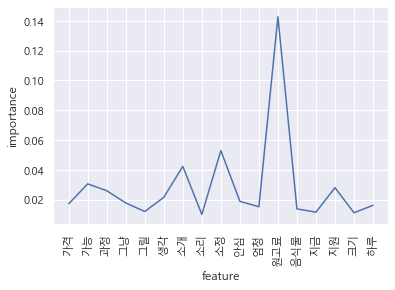

In [170]:
sns.lineplot(x=feature_list.feature, 
             y=feature_list.importance[feature_list.importance>0.01]
            )
plt.xticks(rotation=90)